<a href="https://colab.research.google.com/github/Nessiman/Sentiment-Analysis-Bi-LSTM/blob/main/Bi_LSTM_%5BBig_Data_A%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BigData/dataclean_label.csv')
data

,preprocessed_content,final_sentiment
0,aplikasi ampas bukan mudah malah nyusahin buan...,Negative
1,aplikasi bukan mudah malah susah kpps operasi ...,Neutral
2,ga login padahal spesifikasi hp mumpuni baik,Negative
3,lumayan,Negative
4,raniat,Neutral
...,...,...
7495,aplikasi buat perintah kaga bener ui ux jelek ...,Negative
7496,mohon bantu admin masuk errormassage user exsi...,Neutral
7497,terlalu paksa aplikasi belum siap dan minim si...,Neutral
7498,moga lancar guna sukses milu 2024,Positive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import backend as K
from keras.layers import Layer

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
data[data['final_sentiment'] == 'Negative'].head()

,preprocessed_content,final_sentiment
0,aplikasi ampas bukan mudah malah nyusahin buan...,Negative
2,ga login padahal spesifikasi hp mumpuni baik,Negative
3,lumayan,Negative
5,aplikasi ga guna,Negative
8,baik,Negative


In [ ]:
data[data['final_sentiment'] == 'Positive'].head()

,preprocessed_content,final_sentiment
6,aplikasi sampah mau nipu rakyat aplikasi diset...,Positive
7,buat pusing,Positive
15,diupdate tetep blur hasil kamera gaada fitur f...,Positive
21,maklum sedang uji coba,Positive
59,cepat baik masalah ada waktu mungut suara jadi...,Positive


In [ ]:
data[data['final_sentiment'] == 'Neutral'].head()

,preprocessed_content,final_sentiment
1,aplikasi bukan mudah malah susah kpps operasi ...,Neutral
4,raniat,Neutral
11,sekian banya ulas kok tidak beri b5 nyata biki...,Neutral
13,maaf blm puas sirekap baik anak indonesia pint...,Neutral
18,aplikasi eror terus padahal masukin pw tepat b...,Neutral


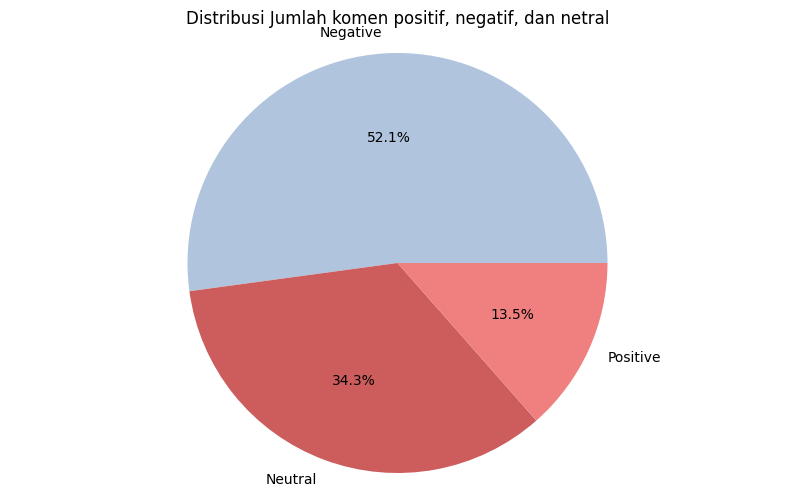

In [ ]:
# Distribusi

label_counts = data['final_sentiment'].value_counts()
colors = 'lightsteelblue', 'indianred', 'lightcoral'

plt.figure(figsize = (10, 6))
plt.pie(label_counts, labels = label_counts.index, autopct = '%1.1f%%', colors = colors)

plt.axis('equal')

plt.title('Distribusi Jumlah komen positif, negatif, dan netral')

plt.show()

In [ ]:
data.describe()

,preprocessed_content,final_sentiment
count,7381,7500
unique,6513,3
top,mantap,Negative
freq,71,3911


## **Encoding Label**
0 = Negative

1 = Positive

2 = Neutral

In [ ]:
data['final_sentiment'] = data['final_sentiment'].apply(lambda x: 0 if x == 'Negative' else (1 if x == 'Positive' else 2))
data.head()

,preprocessed_content,final_sentiment
0,aplikasi ampas bukan mudah malah nyusahin buan...,0
1,aplikasi bukan mudah malah susah kpps operasi ...,2
2,ga login padahal spesifikasi hp mumpuni baik,0
3,lumayan,0
4,raniat,2


In [ ]:
data.final_sentiment.value_counts()

,count
final_sentiment,
0,3911
2,2576
1,1013


In [ ]:
pip install wordcloud

## Workcloud
All, Negative, Positive, Neutral

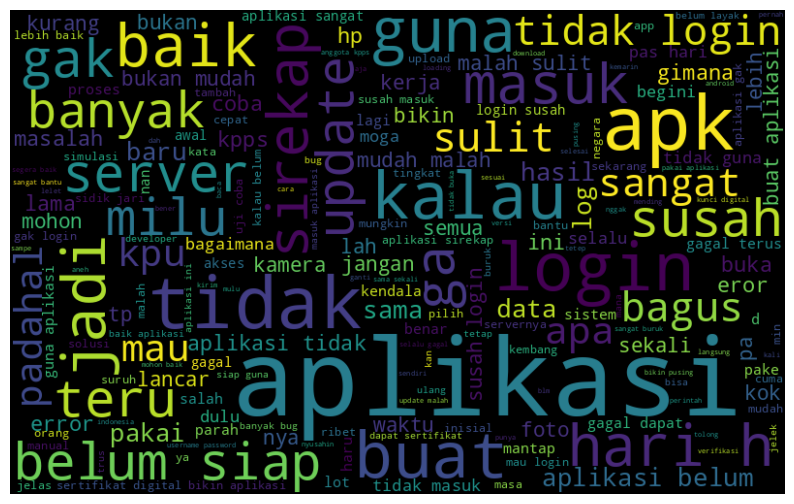

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Mengonversi semua elemen di kolom 'preprocessed_content' menjadi string
all_words = ' '.join([str(text) for text in data['preprocessed_content']])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Menonaktifkan sumbu
plt.show()

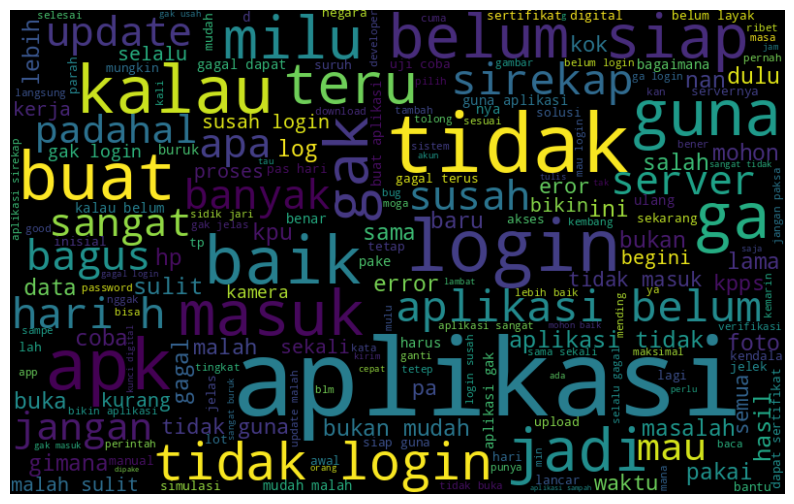

In [ ]:

# Mengonversi semua elemen di kolom 'preprocessed_content' menjadi string
# Hanya memilih baris di mana 'final_sentiment' sama dengan 1
all_words = ' '.join([str(text) for text in data[data['final_sentiment'] == 0]['preprocessed_content']])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


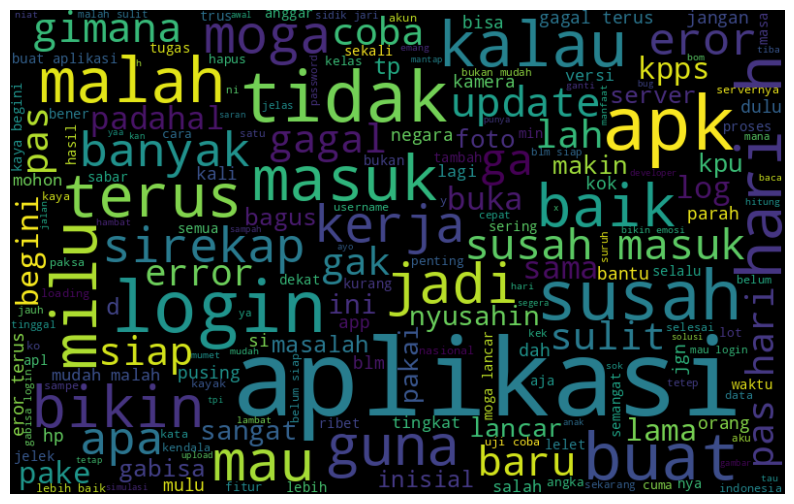

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Mengonversi semua elemen di kolom 'preprocessed_content' menjadi string
# Hanya memilih baris di mana 'final_sentiment' sama dengan 1
all_words = ' '.join([str(text) for text in data[data['final_sentiment'] == 1]['preprocessed_content']])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


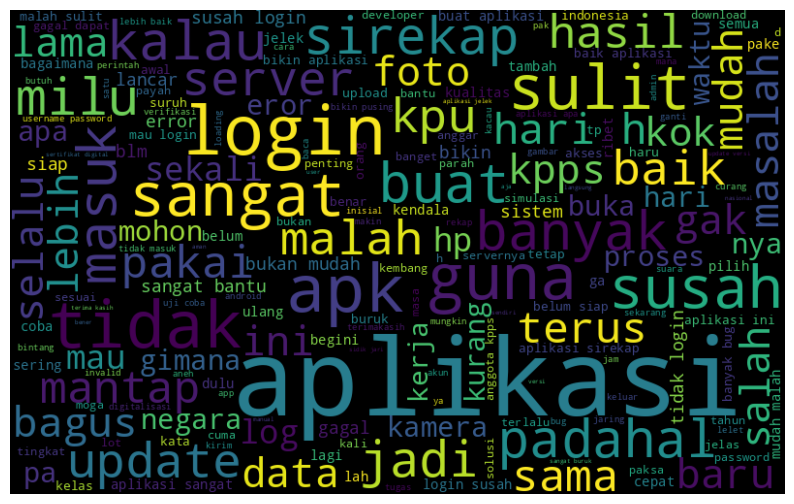

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Mengonversi semua elemen di kolom 'preprocessed_content' menjadi string
# Hanya memilih baris di mana 'final_sentiment' sama dengan 1
all_words = ' '.join([str(text) for text in data[data['final_sentiment'] == 2]['preprocessed_content']])

# Membuat word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Menonaktifkan sumbu
plt.show()


In [ ]:
final_comment = data['preprocessed_content']
label = data['final_sentiment']
dataset = pd.concat([final_comment, label], axis=1)
dataset.head()

,preprocessed_content,final_sentiment
0,aplikasi ampas bukan mudah malah nyusahin buan...,0
1,aplikasi bukan mudah malah susah kpps operasi ...,2
2,ga login padahal spesifikasi hp mumpuni baik,0
3,lumayan,0
4,raniat,2


In [ ]:
data.final_sentiment.value_counts()

,count
final_sentiment,
0,3911
2,2576
1,1013


In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=15000)

In [ ]:
final_comment = final_comment.fillna('')

In [ ]:
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(final_comment)


In [ ]:
# Mencetak vocabulary
print(tfidf_vectorizer.vocabulary_)

{'aplikasi': 498, 'ampas': 252, 'bukan': 1810, 'mudah': 7849, 'malah': 5349, 'nyusahin': 9542, 'buang': 1657, 'anggar': 299, 'aplikasi ampas': 504, 'bukan mudah': 1826, 'mudah malah': 7933, 'malah nyusahin': 5447, 'nyusahin buang': 9552, 'buang buang': 1659, 'buang anggar': 1658, 'susah': 12699, 'kpps': 4623, 'operasi': 9743, 'nya': 9313, 'kamera': 4178, 'app': 797, 'kualitas': 4705, 'sangat': 11781, 'buruk': 1856, 'aplikasi bukan': 543, 'malah susah': 5491, 'susah kpps': 12725, 'operasi nya': 9761, 'nya kamera': 9357, 'kualitas sangat': 4717, 'sangat buruk': 11798, 'ga': 2716, 'login': 5064, 'padahal': 10098, 'spesifikasi': 12551, 'hp': 3468, 'mumpuni': 8148, 'baik': 985, 'ga login': 2752, 'login padahal': 5160, 'padahal spesifikasi': 10239, 'spesifikasi hp': 12552, 'hp mumpuni': 3491, 'mumpuni baik': 8151, 'lumayan': 5259, 'guna': 3098, 'aplikasi ga': 572, 'ga guna': 2740, 'sampah': 11745, 'mau': 6462, 'nipu': 9055, 'rakyat': 11515, 'disetting': 2316, 'angka': 316, 'makanya': 5312, '

In [ ]:
# Menampilkan semua nama fitur
all_feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
for word in all_feature_names:
    # Indeks dalam vocabulary
    indx = tfidf_vectorizer.vocabulary_.get(word)
    # IDF score
    idf_score = tfidf_vectorizer.idf_[indx]
    print(f"{word} : {idf_score}")

Streaming output truncated to the last 5000 lines.
otomatis begini : 9.229644443409692
otomatis fixed : 9.229644443409692
otomatis kece : 9.229644443409692
otomatis kelogout : 9.229644443409692
otomatis keluar : 9.229644443409692
otomatis kluar : 9.229644443409692
otomatis log : 9.229644443409692
otomatis logout : 9.229644443409692
otomatis malah : 9.229644443409692
otomatis minta : 9.229644443409692
otomatis mode : 9.229644443409692
otomatis olah : 9.229644443409692
otomatis pakai : 8.824179335301526
otomatis potong : 9.229644443409692
otomatis sering : 9.229644443409692
otomatis tak : 9.229644443409692
otomatis terus : 9.229644443409692
otomatis ulang : 9.229644443409692
otomatis update : 9.229644443409692
otorisasi : 9.229644443409692
otorisasi terus : 9.229644443409692
otp : 8.536497262849746
otp sidik : 9.229644443409692
otp wa : 9.229644443409692
otw : 8.824179335301526
otw pulang : 9.229644443409692
otw tidak : 9.229644443409692
ountifikasi : 9.229644443409692
ountifikasi aman :

In [ ]:
# Hasil transformasi teks
print(tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Membuat DataFrame untuk hasil TF-IDF
tfidf_df = tfidf.toarray()
df1 = pd.DataFrame(tfidf_df, columns=all_feature_names)

In [ ]:
# Menyiapkan label
y = pd.get_dummies(data['final_sentiment']).values  # One-hot encoding

In [ ]:
# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Jumlah fitur dari TF-IDF
model.add(Dropout(0.5))  # Dropout untuk regularisasi
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))  # Jumlah kelas

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       1,920,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,928,579 (7.36 MB)

 Trainable params: 1,928,579 (7.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Melatih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.5214 - loss: 0.9971 - val_accuracy: 0.6358 - val_loss: 0.8338
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7372 - loss: 0.6595 - val_accuracy: 0.6758 - val_loss: 0.7972
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8740 - loss: 0.3684 - val_accuracy: 0.6508 - val_loss: 0.9464
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9349 - loss: 0.2016 - val_accuracy: 0.6542 - val_loss: 1.0748
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9632 - loss: 0.1297 - val_accuracy: 0.6533 - val_loss: 1.2176
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9622 - loss: 0.1023 - val_accuracy: 0.6508 - val_loss: 1.2778
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9684 - loss: 0.0845 - val_accuracy: 0.6625 - val_loss: 1.3708
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9764 - loss: 0.0708 - val_ac

In [ ]:
# Prediksi dengan data pengujian
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
# Mengonversi prediksi ke kelas
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Menghitung jumlah prediksi untuk setiap kelas
predicted_counts = np.bincount(y_pred_classes)

In [ ]:
# Jika kelas positif = 0, negatif = 1, netral = 2
classes = ['Positive', 'Negative', 'Neutral']
predicted_distribution = dict(zip(classes, predicted_counts))

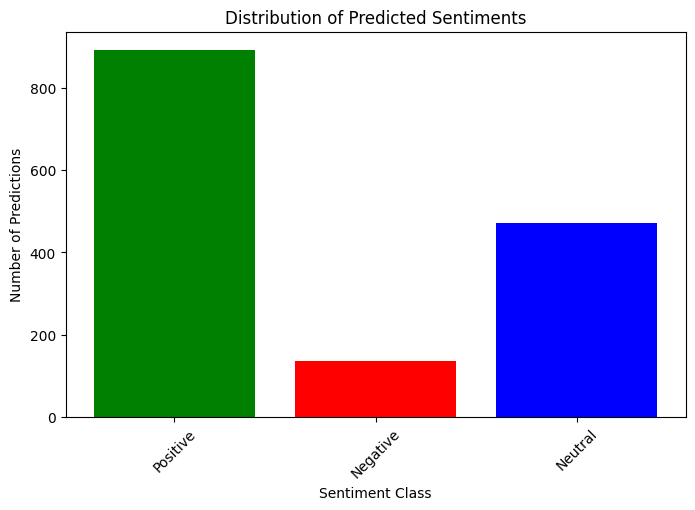

In [ ]:
# Visualisasi dengan Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(predicted_distribution.keys(), predicted_distribution.values(), color=['green', 'red', 'blue'])
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Predictions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))

Accuracy: 0.656


In [ ]:
# Laporan klasifikasi
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       798
           1       0.50      0.33      0.40       208
           2       0.59      0.56      0.58       494

    accuracy                           0.66      1500
   macro avg       0.60      0.56      0.58      1500
weighted avg       0.64      0.66      0.65      1500



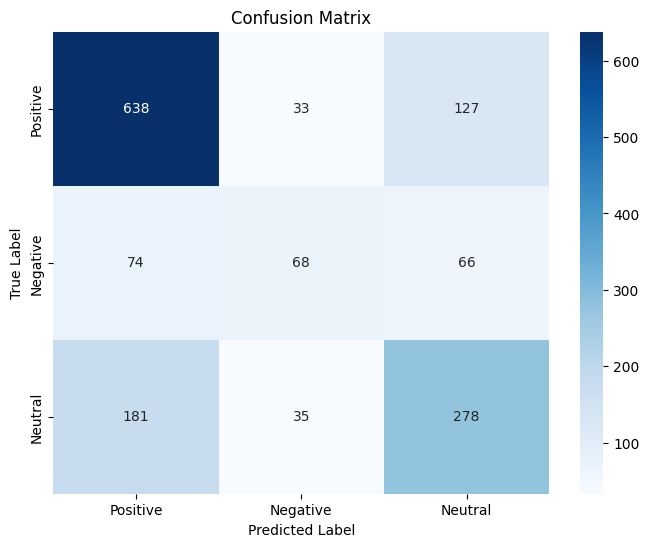

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)# Tentukan label kelas
classes = ['Positive', 'Negative', 'Neutral']

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Parameter Optimization

# Layer Atention

Github

In [1]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [32]:
!git config --global user.name "Nessiman"
!git config --global user.email "Annessiman@gmail.com"

In [42]:
!git init Sentiment-Analysis-Aplikasi-SiReKAP-Bi-LSTM

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/Sentiment-Analysis-Bi-LSTM/Sentiment-Analysis-Aplikasi-SiReKAP-Bi-LSTM/.git/


In [48]:
!echo "#Sentiment-Analysis-Aplikasi-SiReKAP-Bi-LSTM" > README.md

In [50]:
!git init

Reinitialized existing Git repository in /content/Sentiment-Analysis-Bi-LSTM/.git/


In [52]:
!git add README.md

In [53]:
!git commit -m "veri 101"

[main (root-commit) 0b0487b] veri 101
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


In [56]:
!git branch -M main

In [63]:
!git remote remove origin